In [1]:
#-*- coding:utf-8 -*-

# pandas import 
import pandas as pd

# warnings
import warnings

# numpy import
import numpy as np

# Graph lib import 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

# heatmap
import seaborn as sns

# 피어슨 상관계수 
import scipy.stats as stats

# OLS Regression
import statsmodels.formula.api as smf

# Logistic Regression
import statsmodels.api as sm

# pre-required pip3 install factor-analyzer
from factor_analyzer import FactorAnalyzer

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


# 각 열, 응답문항에 대하여 집계 한 데이터 return
def q13a_agg_col(col_name, agg_type, each_cnt, df, surfix):
    data = {}
    for i in range(1, each_cnt):
        col_idx = f'{i:02}'            # lpad 0, 2 length
        col_nm = col_name + col_idx 
        data[col_nm + '_' + surfix] = df[col_nm].groupby(df[col_nm]).agg(agg_type)
    return data

# cronbach alpha 
def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
        mean_r = np.mean(rs)
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha


# 피어슨 상관계수를 구한뒤 dataFrame 으로 변환한다.
def pearson_frame(index_col, data_frame, each_cnt, col_list):
    data = {}
    for i in range(1, each_cnt):
        pear_val = stats.pearsonr(data_frame.corr()[index_col], data_frame.corr()[col_list[i-1]])
        data[col_list[i-1]] = pear_val
        
    res_data = pd.DataFrame.from_dict(data)
    res_data = res_data.rename(index={0 : '피어슨 상관계수 r', 1 : 'p-value'})
    return res_data

# raw data 5점 척도 변환

# one hot encoding 
def change_one_hot(origin_df, each_cnt, prefix):
    convert_df = origin_df
    for i in range(1, each_cnt):
        col_idx = f'{i:02}'
        col_nm = prefix + col_idx
        convert_df[col_nm] = convert_df[col_nm].apply(lambda x : 0 if x <= 4 else 1)
    return convert_df 


def change_one_hot_by_median(origin_df, each_cnt, prefix):
    convert_df = origin_df
    for i in range(1, each_cnt):
        col_idx = f'{i:02}'
        col_nm = prefix + col_idx
        
        # 중앙값 기준으로 -> 중앙값보다 작거나 같으면 0, 중앙값보다 크면 1 이다.
        this_median = convert_df[col_nm].mode()
        convert_df[col_nm] = convert_df[col_nm].apply(lambda x : 0 if x < int(this_median) else 1)
    return convert_df

def change_one_hot_by_median_col(origin_df, col_name):
    convert_df = origin_df
    convert_df[col_name] = convert_df[col_name].apply(lambda x : 0 if x <= 4 else 1)
    return convert_df

def change_one_hot_by_mode(origin_df, each_cnt, prefix):
    convert_df = origin_df
    for i in range(1, each_cnt):
        col_idx = f'{i:02}'
        col_nm = prefix + col_idx
        
        # 최빈값 기준으로 -> 최빈값보다 작으면 0, 최빈값보다 크면 1 이다.
        this_median = convert_df[col_nm].mode()
        convert_df[col_nm] = convert_df[col_nm].apply(lambda x : 0 if x < int(this_median) else 1)
    return convert_df


# view to heatmap
def view_to_heatmap(x_size, y_size, df_corr ):
    plt.figure(figsize=(x_size,y_size))


    # 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # 히트맵을 그린다
    sns.heatmap(df_corr, 
                cmap = 'RdYlBu_r', 
                annot = True,   # 실제 값을 표시한다
                mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
                linewidths=.5,  # 경계면 실선으로 구분하기
                cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
                vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
               )
    
    
def export_one_hot_csv(df_param, path, file_name):
    origin_df  = change_one_hot(df_param.copy(), 15, 'q13a')
    store_path = path+'/'+file_name + '.csv'
    origin_df.to_csv(store_path)
    
    
def export_csv(df_param, path, file_name):
    origin_df = df_param
    store_path = path + '/' + file_name + '.csv'
    origion_df.to_csv(store_path)

In [2]:
biz_sample_data = pd.read_csv('./data4/business_500.csv')

# biz_sample_data

trip_sample_data = pd.read_csv('./data4/trip_500.csv')

# trip_sample_data

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

def plot_hierarchical_clusters(data):
    Z1 = linkage(data, method='average', metric='euclidean')
    Z2 = linkage(data, method='complete', metric='cityblock')

    fig = plt.figure(figsize=(14,6))

    ax1 = plt.subplot(1,2,1)    
    dendrogram(Z1)
    ax1.set_xticks([])

    plt.title("method=average, metric=euclidic")

    ax2 = plt.subplot(1,2,2)
    dendrogram(Z2)
    ax2.set_xticks([])

    plt.title("method=complete, metric=cityblock")

    plt.show()

### 비즈니스 500개 표본

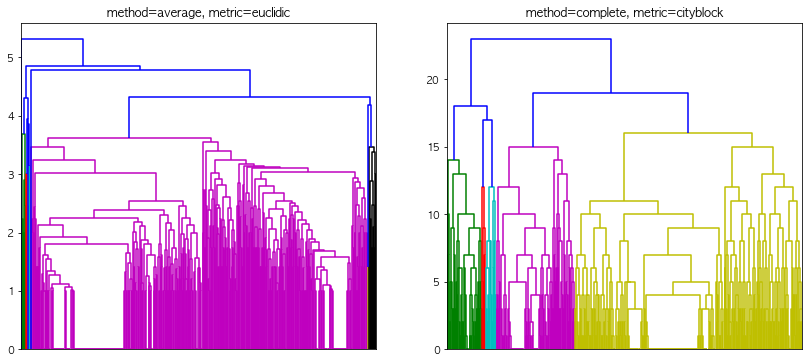

In [6]:
plot_hierarchical_clusters(biz_sample_data)

### 관광 500개 표본

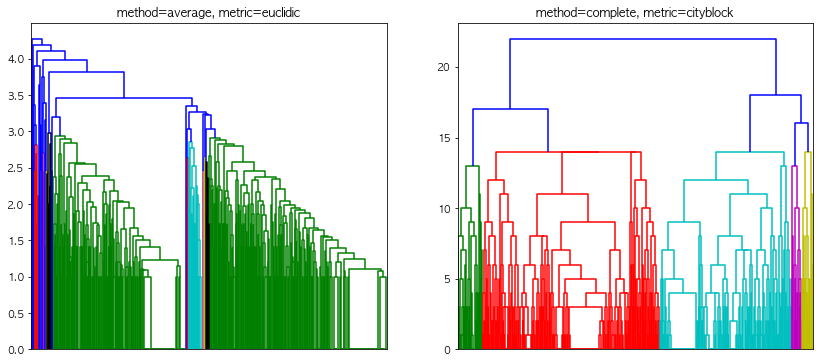

In [9]:
plot_hierarchical_clusters(trip_sample_data)

In [12]:
from sklearn.cluster import KMeans

#from sklearn.cluster import AgglomerativeClustering
#ac = AgglomerativeClustering(n_clusters=2).fit(data)

def apply_kmeans(data):
    k = KMeans(n_clusters=2).fit(data)

    # index of the cluster each sample belongs to
    labels = k.labels_
    cluster_centers = np.round(k.cluster_centers_).astype(int)

    print("For", len(data), "samples...")
    print()
    print(cluster_centers, " are the cluster centers, and")
    print()
    print(labels, " are the labels for each sample.")
    
    return labels, cluster_centers



In [10]:
biz_labels, cluster_centers = apply_kmeans(biz_sample_data)

For 500 samples...

[[5 5 5 5 5 5 5 4 5 5 1]
 [4 4 4 4 4 4 4 3 4 4 0]]  are the cluster centers, and

[1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 

In [18]:
trip_labels, cluster_centers = apply_kmeans(trip_sample_data)

For 500 samples...

[[4 4 4 4 4 4 4 3 4 4 0]
 [5 5 5 5 5 5 5 4 5 5 1]]  are the cluster centers, and

[0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0
 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 

In [13]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

def normalize_likert(data):
    # (1,5) to (-1,1)
    return (data - 3) / 2.0

def run_pca(data):

    # apply PCA
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(data)
    print(pca.explained_variance_ratio_)
    return x_pca

def run_mds(data):

    # apply MDS
    mds = MDS(n_components=2)
    x_mds = mds.fit_transform(data)

    return x_mds
    
def run_tsne(data):
    
    # apply t-SNE
    tsne = TSNE(n_components=2, perplexity=5.0)
    x_tsne = tsne.fit_transform(data)
    
    return x_tsne

In [14]:
# plot all three methods

def plot_clusters(xpca, xmds, xtsne, labels):
    """ Plots PCA, MDS T-sne clusters with colored labels. """

    fig = plt.figure(1, figsize=(18,6))
    #fig.suptitle("Cluster visualization", fontsize=12)
    fig.subplots_adjust(top=0.85)

    ax = plt.subplot(1,3,1)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.scatter(xpca[:,0], xpca[:,1], s=50, alpha=0.5, c=labels, cmap=plt.cm.get_cmap('plasma'))
    plt.title("Principal Component Analysis")

    ax = plt.subplot(1,3,2)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.title("Multi-Dimensional Scaling")
    plt.scatter(xmds[:,0], xmds[:,1], s=50, alpha=0.5, c=labels, cmap=plt.cm.get_cmap('plasma'))

    ax = plt.subplot(1,3,3)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.title("t-SNE")
    plt.scatter(xtsne[:,0], xtsne[:,1], s=50, alpha=0.5, c=labels, cmap=plt.cm.get_cmap('plasma'))

    plt.show()

In [15]:
# run algorithms to reduce dimensions to 2D
biz_normalized = normalize_likert(biz_sample_data)
biz_x_pca = run_pca(biz_normalized)
biz_x_mds = run_mds(biz_normalized)
biz_x_tsne = run_tsne(biz_normalized)

[0.48330509 0.10735726]


### 비즈니스 500개 표본 PCA, MDS, t-SNE

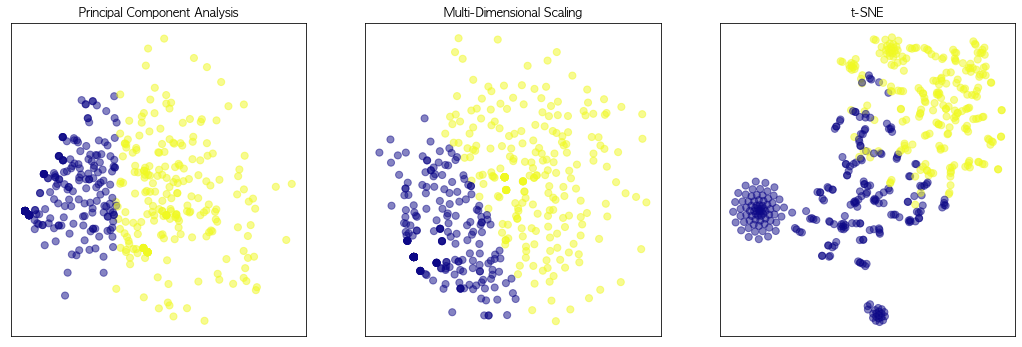

In [22]:
# visualise clusters
biz_labels = biz_labels
plot_clusters(biz_x_pca, biz_x_mds, biz_x_tsne, biz_labels)

In [17]:
# run algorithms to reduce dimensions to 2D
trip_normalized = normalize_likert(trip_sample_data)
trip_x_pca = run_pca(trip_normalized)
trip_x_mds = run_mds(trip_normalized)
trip_x_tsne = run_tsne(trip_normalized)

[0.46742459 0.11235939]


### 관광 500개 표본 PCA, MDS, t-SNE

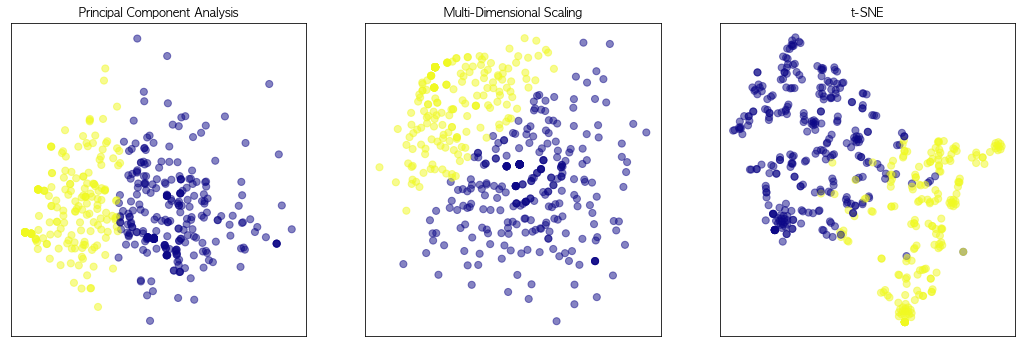

In [20]:
# visualise clusters
trip_labels = trip_labels
plot_clusters(trip_x_pca, trip_x_mds, trip_x_tsne, trip_labels)